In [99]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd

### Load Images

In [101]:
df = pd.read_csv('Test.csv')
# df['ClassId'].sort_values(ascending=True).unique()
df.Path

0        Test/00000.png
1        Test/00001.png
2        Test/00002.png
3        Test/00003.png
4        Test/00004.png
5        Test/00005.png
6        Test/00006.png
7        Test/00007.png
8        Test/00008.png
9        Test/00009.png
10       Test/00010.png
11       Test/00011.png
12       Test/00012.png
13       Test/00013.png
14       Test/00014.png
15       Test/00015.png
16       Test/00016.png
17       Test/00017.png
18       Test/00018.png
19       Test/00019.png
20       Test/00020.png
21       Test/00021.png
22       Test/00022.png
23       Test/00023.png
24       Test/00024.png
25       Test/00025.png
26       Test/00026.png
27       Test/00027.png
28       Test/00028.png
29       Test/00029.png
              ...      
12600    Test/12600.png
12601    Test/12601.png
12602    Test/12602.png
12603    Test/12603.png
12604    Test/12604.png
12605    Test/12605.png
12606    Test/12606.png
12607    Test/12607.png
12608    Test/12608.png
12609    Test/12609.png
12610    Test/12

In [97]:
train_data_dir = '../Mod 6 Project/Train'
test_data_dir = '../Mod 6 Project/Test\'

SyntaxError: EOL while scanning string literal (<ipython-input-97-83c9071d28a3>, line 2)

In [98]:
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=1000)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=100)

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 39209 images belonging to 43 classes.


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '../Mod 6 Project/*.png'

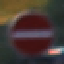

In [87]:
array_to_img(train_images[1])

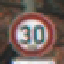

In [92]:
array_to_img(test_images[0])

In [89]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(1000, 64, 64, 3)
(1000, 43)
(100, 64, 64, 3)
(100, 4)


In [90]:
train_img_unrow = train_images.reshape(1000, -1).T
test_img_unrow = test_images.reshape(100, -1).T

In [91]:
train_labels_final.shape

(43, 1000)

In [78]:
## PSEDUO
test_labels_final_df = test_labels_df.reshape(1,1000)

In [30]:
test_labels_final = test_labels.T

In [32]:
train_img_final = train_img_unrow / 255
test_img_final = test_img_unrow / 255

In [39]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(43, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 43)        49579     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 43)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1548)             

In [42]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 4.1155 - accuracy: 0.1820
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.7951 - accuracy: 0.3040
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3859 - accuracy: 0.3920
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0865 - accuracy: 0.4790
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8975 - accuracy: 0.5160
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5149 - accuracy: 0.6080
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3793 - accuracy: 0.6200
Epoch 8/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.0464 - accuracy: 0.7010
Epoch 9/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1465 - accuracy: 0.7200
Epoch 10/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.716

In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels_final_df)

ValueError: Error when checking target: expected dense_4 to have shape (43,) but got array with shape (1000,)